# Project Chicago: Transform ResStock BASELINE Results to 15 SFD prototypes (Elevate Energy)
Created on: 10/15/2020 \
By: 
 - Lixi Liu (Lixi.Liu@nrel.gov)
 - Tobi Adekanye

In [1]:
import pandas as pd
import numpy as np
import os
print(f'Notebook path: {os.getcwd()}')

Notebook path: /Users/lliu2/Documents/GitHub/ResStock/files


### Download results from S3 or Eagle
://S3/resbldg-datasets/chicagoeui

In [2]:
# local path to downloaded results
iteration = '_12' # <----- options: 'base', '_01'~'_11', '_national_2018'
result_path = '/Users/lliu2/Documents/Chicago retrofits/ResStock results/'
iteration_path = f'cookcnty_2007{iteration}/baseline' 
baseline_result = os.path.join(result_path,iteration_path,'results_up00.parquet')
print(f'Result and file storage path: {iteration_path}')


Result and file storage path: cookcnty_2007_12/baseline


In [3]:
### functions
def add_sqft_eui(df):
    global res
    sqft_map = {'0-499': 328,
                '500-749': 633,
                '750-999': 885,
                '1000-1499': 1220,
                '1500-1999': 1690,
                '2000-2499': 2176,
                '2500-2999': 2663,
                '3000-3999': 3301,
                '4000+': 8194}

    df['sqft'] = res['build_existing_model.geometry_floor_area'].map(sqft_map)
    df['gas_eui'] = df['simulation_output_report.total_site_natural_gas_therm'].divide(df['sqft']) # therm/sqft
    df['elec_eui'] = df['simulation_output_report.total_site_electricity_kwh'].divide(df['sqft']) # kwh/sqft
    df['site_eui'] = df['simulation_output_report.total_site_energy_mbtu'].divide(df['sqft'])*1000 # kbtu/sqft
    
    return df

print('func loaded: "add_sqft_eui"')

def get_res_by_prototype(df, slice_by_df, row):
    """
    df: df to slice on
    slice_by_df: df used to do the slicing
    """
    res_group_i = df[slice_by_df['build_existing_model.geometry_stories'].isin(row['Stories'].split(',')) & \
        slice_by_df['build_existing_model.geometry_wall_type'].isin(row['WallType'].split(',')) & \
        slice_by_df['build_existing_model.vintage_acs'].isin(row['Vintage'].split(',')) & \
        slice_by_df['build_existing_model.geometry_building_type_recs'].isin(['Single-Family Detached'])]
    res_group_i = res_group_i[res_group_i['completed_status']=="Success"]
    
    return res_group_i

print('func loaded: "get_res_by_prototype"')

func loaded: "add_sqft_eui"
func loaded: "get_res_by_prototype"


In [4]:
res = pd.read_parquet(baseline_result)
res

,building_id,job_id,started_at,completed_at,completed_status,apply_upgrade.applicable,apply_upgrade.upgrade_name,apply_upgrade.reference_scenario,build_existing_model.ahs_region,build_existing_model.applicable,...,qoi_report.average_maximum_daily_use_overlap_kw,qoi_report.average_minimum_daily_use_cooling_kw,qoi_report.average_minimum_daily_use_heating_kw,qoi_report.average_minimum_daily_use_overlap_kw,qoi_report.average_of_top_ten_highest_peaks_timing_cooling_hour,qoi_report.average_of_top_ten_highest_peaks_timing_heating_hour,qoi_report.average_of_top_ten_highest_peaks_use_cooling_kw,qoi_report.average_of_top_ten_highest_peaks_use_heating_kw,qoi_report.peak_magnitude_timing_kw,qoi_report.peak_magnitude_use_kw
0,1,35,2021-01-31 21:25:47,2021-01-31 21:27:04,Success,NaN,NaN,,"CBSA Chicago-Naperville-Elgin, IL-IN-WI",True,...,12.195791,3.918606,2.105576,2.524894,17.363636,18.454545,18.896789,14.990603,5346.0,20.489417
1,2,10,2021-01-31 20:36:40,2021-01-31 20:37:53,Success,NaN,NaN,,"CBSA Chicago-Naperville-Elgin, IL-IN-WI",True,...,18.412183,8.258352,6.093682,5.060321,15.636364,17.363636,30.913788,22.034863,6686.0,33.729591
2,3,40,2021-01-31 21:00:33,2021-01-31 21:01:58,Success,NaN,NaN,,"CBSA Chicago-Naperville-Elgin, IL-IN-WI",True,...,8.016975,2.232581,2.479148,1.645619,15.545455,18.363636,16.396183,9.719040,6687.0,17.291352
3,4,23,2021-01-31 21:11:37,2021-01-31 21:14:45,Success,NaN,NaN,,"CBSA Chicago-Naperville-Elgin, IL-IN-WI",True,...,82.138683,33.467491,19.032993,17.371771,15.000000,16.636364,167.293135,168.720538,67.0,262.157383
4,5,4,2021-01-31 21:28:55,2021-01-31 21:30:12,Success,NaN,NaN,,"CBSA Chicago-Naperville-Elgin, IL-IN-WI",True,...,6.050258,1.883497,2.005345,1.363051,17.181818,18.454545,12.431255,8.999961,5322.0,14.317176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,39996,27,2021-01-31 21:12:32,2021-01-31 21:13:48,Success,NaN,NaN,,"CBSA Chicago-Naperville-Elgin, IL-IN-WI",True,...,9.143412,1.751807,1.184854,1.293943,15.272727,17.090909,17.495798,8.398064,3928.0,18.833847
39996,39997,31,2021-01-31 21:09:46,2021-01-31 21:11:07,Success,NaN,NaN,,"CBSA Chicago-Naperville-Elgin, IL-IN-WI",True,...,10.306943,1.273525,2.017209,1.254633,16.000000,16.000000,34.574241,33.200340,5847.0,41.968056
39997,39998,8,2021-01-31 20:36:31,2021-01-31 20:41:00,Success,NaN,NaN,,"CBSA Chicago-Naperville-Elgin, IL-IN-WI",True,...,162.030001,68.314896,34.679209,38.648836,19.181818,18.818182,241.469409,157.087861,3212.0,258.022776
39998,39999,8,2021-01-31 21:14:15,2021-01-31 21:15:44,Success,NaN,NaN,,"CBSA Chicago-Naperville-Elgin, IL-IN-WI",True,...,15.848421,11.055973,2.241238,3.121428,15.818182,16.818182,33.109015,12.685046,4546.0,34.392692


In [5]:
if iteration == '_national_2018':
    res = res[res['build_existing_model.ahs_region']=='CBSA Chicago-Naperville-Elgin, IL-IN-WI'].reset_index(drop=True)
    res

In [6]:
### HVAC cols changed after HVAC restructuring (implemented in Run5)
if iteration in ['base','_01','_02','_04']:
    cooling_col = 'build_existing_model.hvac_system_cooling_type'
else:
    cooling_col = 'build_existing_model.hvac_cooling_type'
if iteration in ['base','_01','_02','_04']:
    heating_col = 'build_existing_model.hvac_system_heating_natural_gas'
else:
    heating_col = 'build_existing_model.hvac_heating_type_and_fuel'
print('selected')


selected


### Check housing charateristics distributions

In [7]:
proto_chars = ['build_existing_model.geometry_stories',
              'build_existing_model.geometry_wall_type',
              'build_existing_model.vintage_acs',
              cooling_col,
              heating_col,
              'build_existing_model.geometry_floor_area'
             ]

Ns = len(res.query('completed_status=="Success"')); N = len(res)
print(f'>>> ResStock - {iteration_path} - RESULT SUMMARY:\n')
print(f'  * {Ns} / {N} samples ran successfully, {N-Ns} failed, efficacy: {Ns/N:.1%} \n')

print('>>> Housing characteristics splits:\n')

Res_char = []
for i, char in enumerate(proto_chars,1):
    Nchar = res.groupby(char)['building_id'].count()
    Nchar = Nchar/Ns
    Nchar['N_failed'] = len(res[res[char].isnull()])
    print(f'  * [{i}] {Nchar}\n')
    
    ## append for export
    Nchar = Nchar.rename('fraction').to_frame()
    Nchar['housing_char'] = Nchar.index.name
    Res_char.append(Nchar)
    
Res_char = pd.concat(Res_char, axis=0)
Res_char.index.name = 'sub_char'
Res_char = Res_char.reset_index()
Res_char = Res_char[['housing_char','sub_char','fraction']]

Res_char.to_csv(os.path.join(result_path, iteration_path, 'baseline_housing_char_breakdown.csv'), index=False)
print(f'>>> file saved to:\n  {os.path.join(result_path, iteration_path)}')

>>> ResStock - cookcnty_2007_12/baseline - RESULT SUMMARY:

  * 39976 / 40000 samples ran successfully, 24 failed, efficacy: 99.9% 

>>> Housing characteristics splits:

  * [1] build_existing_model.geometry_stories
1            0.525790
2            0.260106
3            0.214103
N_failed    24.000000
Name: building_id, dtype: float64

  * [2] build_existing_model.geometry_wall_type
Masonry      0.715204
WoodStud     0.284796
N_failed    24.000000
Name: building_id, dtype: float64

  * [3] build_existing_model.vintage_acs
1940-59      0.235066
1960-79      0.255003
1980-99      0.137833
2000-09      0.076146
2010s        0.011682
<1940        0.284271
N_failed    24.000000
Name: building_id, dtype: float64

  * [4] build_existing_model.hvac_cooling_type
Central AC     0.616595
Heat Pump      0.025615
None           0.052206
Room AC        0.305583
N_failed      24.000000
Name: building_id, dtype: float64

  * [5] build_existing_model.hvac_heating_type_and_fuel
Electricity ASHP        

In [8]:
f = pd.read_parquet('/Users/lliu2/Documents/Chicago retrofits/ResStock results/cookcnty_upgrades_03_mf/baseline/results_up00.parquet')

f.to_csv(
    '/Users/lliu2/Documents/Chicago retrofits/ResStock results/cookcnty_upgrades_03_mf/baseline/results_up00.csv',
    index=False
)

### Add additional metrics to ResStock results

In [9]:
res['build_existing_model.units_modeled'] = pd.to_numeric(res['build_existing_model.units_modeled'])

# (1) get sqft, gas/elec/site eui
res = add_sqft_eui(res)


# (2) aggregate heating and cooling end uses in ResStock results
res['total_gas_heating'] = res['simulation_output_report.natural_gas_central_system_heating_therm'] +\
    res['simulation_output_report.natural_gas_heating_therm']

res['total_elec_heating'] = res['simulation_output_report.electricity_central_system_heating_kwh'] +\
    res['simulation_output_report.electricity_central_system_pumps_heating_kwh'] +\
    res['simulation_output_report.electricity_fans_heating_kwh'] +\
    res['simulation_output_report.electricity_heating_kwh'] +\
    res['simulation_output_report.electricity_pumps_heating_kwh']

res['total_elec_cooling'] = res['simulation_output_report.electricity_central_system_cooling_kwh'] +\
    res['simulation_output_report.electricity_central_system_pumps_cooling_kwh'] +\
    res['simulation_output_report.electricity_cooling_kwh'] +\
    res['simulation_output_report.electricity_fans_cooling_kwh'] +\
    res['simulation_output_report.electricity_pumps_cooling_kwh']


## EE prototype tags
res['vintage'] = 'Post-1978'
res.loc[res['build_existing_model.vintage_acs'].isin(['1940-59','1960-79']),'vintage'] = '1942-1978'
res.loc[res['build_existing_model.vintage_acs']=='<1940','vintage'] = 'Pre-1942'

res['stories'] = '2+ stories'
res.loc[res['build_existing_model.geometry_stories']=='1','stories'] = '<2 stories'

res['bldg_type'] = res['build_existing_model.geometry_building_type_recs'].replace({
    'Single-Family Detached': 'SFD',
    'Multi-Family with 2 - 4 Units': 'MF 2-4 Flat',
    'Multi-Family with 5+ Units': 'MF 5+ Units',
    'Single-Family Attached': 'SFA',
    'Mobile Home': 'MH',
})
res['wall_type'] = res['build_existing_model.geometry_wall_type'].replace({
    'WoodStud': 'Frame',
})

## breakdowns of core bldg types
res['core_bldg_types'] = res['bldg_type'] + ' ' + res['wall_type'] + ' ' + res['vintage']
res['Priority Housing, Baseline'] = res['core_bldg_types']
res.loc[res['Priority Housing, Baseline'].str[:19] == 'MF 2-4 Flat Masonry',
       'Priority Housing, Baseline'] = 'MF 2-4 Flat Masonry'
res.loc[res['Priority Housing, Baseline'].str[:17] == 'MF 2-4 Flat Frame',
       'Priority Housing, Baseline'] = 'MF 2-4 Flat Frame'

print('new cols added to "res"')

res['Priority Housing, Baseline'].value_counts()

new cols added to "res"


SFD Masonry 1942-1978            6282
MF 2-4 Flat Masonry              5891
MF 5+ Units Masonry 1942-1978    5516
SFD Frame 1942-1978              4150
MF 5+ Units Masonry Post-1978    3851
MF 5+ Units Masonry Pre-1942     2959
SFD Frame Pre-1942               2128
MF 2-4 Flat Frame                1821
SFD Masonry Pre-1942             1647
SFD Frame Post-1978              1347
SFD Masonry Post-1978            1199
SFA Masonry Post-1978             596
SFA Frame Post-1978               553
SFA Masonry 1942-1978             472
SFA Frame 1942-1978               360
MF 5+ Units Frame Pre-1942        329
MF 5+ Units Frame 1942-1978       219
SFA Masonry Pre-1942              178
MF 5+ Units Frame Post-1978       173
MH Frame Post-1978                164
MH Frame 1942-1978                102
SFA Frame Pre-1942                 20
MH Frame Pre-1942                  19
Name: Priority Housing, Baseline, dtype: int64

In [10]:
res.groupby(['build_existing_model.chicago','build_existing_model.heating_fuel'])['building_id'].count() / \
res.groupby(['build_existing_model.chicago'])['building_id'].count()

build_existing_model.chicago  build_existing_model.heating_fuel
City of Chicago               Electricity                          0.140565
                              Fuel Oil                             0.001360
                              Natural Gas                          0.823489
                              None                                 0.014188
                              Other Fuel                           0.008794
                              Propane                              0.011604
Non-City Cook County          Electricity                          0.118839
                              Fuel Oil                             0.000391
                              Natural Gas                          0.861903
                              None                                 0.004968
                              Other Fuel                           0.005135
                              Propane                              0.008764
Name: building_id, dtype

In [11]:
res['bldg_factor'] = 1/res['build_existing_model.units_represented']
res.groupby(['build_existing_model.chicago','core_bldg_types'])['bldg_factor'].sum().to_frame()

bldg_factor
build_existing_model.chicago core_bldg_types                           
City of Chicago              MF 2-4 Flat Frame 1942-1978      68.916667
                             MF 2-4 Flat Frame Post-1978      30.750000
                             MF 2-4 Flat Frame Pre-1942      517.083333
                             MF 2-4 Flat Masonry 1942-1978   614.416667
                             MF 2-4 Flat Masonry Post-1978   232.000000
                             MF 2-4 Flat Masonry Pre-1942    924.166667
                             MF 5+ Units Frame 1942-1978      10.439220
                             MF 5+ Units Frame Post-1978       4.833201
                             MF 5+ Units Frame Pre-1942       21.991733
                             MF 5+ Units Masonry 1942-1978   196.462037
                             MF 5+ Units Masonry Post-1978   122.262831
                             MF 5+ Units Masonry Pre-1942    208.592857
                             MH Frame 1942-1978               25.000000
                             MH Frame Post-1978               20.000000
                             MH Frame Pre-1942                13.000000
                             SFA Frame 1942-1978              11.455833
                             SFA Frame Post-1978              15.469127
                             SFA Frame Pre-1942                1.505556
                             SFA Masonry 1942-1978            21.981825
                             SFA Masonry Post-1978            18.642540
                             SFA Masonry Pre-1942             15.269841
                             SFD Frame 1942-1978            1216.000000
                             SFD Frame Post-1978             293.000000
                             SFD Frame Pre-1942             1317.000000
                             SFD Masonry 1942-1978          2162.000000
                             SFD Masonry Post-1978           258.000000
                             SFD Masonry Pre-1942            959.000000
Non-City Cook County         MF 2-4 Flat Frame 1942-1978      19.333333
                             MF 2-4 Flat Frame Post-1978      11.833333
                             MF 2-4 Flat Frame Pre-1942       76.833333
                             MF 2-4 Flat Masonry 1942-1978   254.166667
                             MF 2-4 Flat Masonry Post-1978   114.500000
                             MF 2-4 Flat Masonry Pre-1942    127.166667
                             MF 5+ Units Frame 1942-1978       5.703439
                             MF 5+ Units Frame Post-1978       4.355622
                             MF 5+ Units Frame Pre-1942        3.367262
                             MF 5+ Units Masonry 1942-1978   178.292328
                             MF 5+ Units Masonry Post-1978    99.158333
                             MF 5+ Units Masonry Pre-1942     30.245966
                             MH Frame 1942-1978               77.000000
                             MH Frame Post-1978              144.000000
                             MH Frame Pre-1942                 6.000000
                             SFA Frame 1942-1978              26.511310
                             SFA Frame Post-1978              44.536627
                             SFA Frame Pre-1942                0.436111
                             SFA Masonry 1942-1978            28.134246
                             SFA Masonry Post-1978            45.306468
                             SFA Masonry Pre-1942              2.559881
                             SFD Frame 1942-1978            2934.000000
                             SFD Frame Post-1978            1054.000000
                             SFD Frame Pre-1942              811.000000
                             SFD Masonry 1942-1978          4120.000000
                             SFD Masonry Post-1978           941.000000
                             SFD Masonry Pre-1942            688.000000

In [12]:
def get_annual_totals(pp, get_col_only=False):
    if get_col_only:
        p = pp.copy()
    else:
        p = pp
        
    p['ann_gas_cost'] = \
        p['simulation_output_report.total_site_natural_gas_therm']*p['gas_rate']+p['gas_fixed']
    p['ann_elec_cost'] = \
        p['simulation_output_report.total_site_electricity_kwh']*p['elec_rate']+p['elec_fixed']
    p['ann_energy_cost'] = \
        p['ann_gas_cost'] + p['ann_elec_cost']
    
    p['ann_metric_ton_co2e_gas'] = \
        p['simulation_output_report.total_site_natural_gas_therm']*p['gas_CO2_rate']
    p['ann_metric_ton_co2e_elec'] = \
        p['simulation_output_report.total_site_electricity_kwh']*p['elec_CO2_rate']
    p['ann_metric_ton_co2e'] = \
        p['ann_metric_ton_co2e_gas'] + p['ann_metric_ton_co2e_elec']
    
    if get_col_only:
        return p[['ann_gas_cost','ann_elec_cost','ann_energy_cost',
                 'ann_metric_ton_co2e_gas','ann_metric_ton_co2e_elec','ann_metric_ton_co2e']]
    else:
        return p

In [13]:
# (3) Utility costs & Carbon emissions
NG_rate_multiplier = 1 # <----

## electricity ##
# annual fixed rates = monthly x 12
EH_fixed = 15.70 * 12 # annual
NEH_fixed = 14.28 *12 # annual
# avg of summer rates (J,J,A,S) and non-summer rates
EH_rate = (0.10273*4+0.10952*8)/12 # 0.08019, $/kWh, electric rate for electric heating customers
NEH_rate = (0.12168*4+0.12847*8)/12 # 0.09889, $/kWh, electric rate for non-electric heating customers
# marginal carbon emission factor:
elec_CO2_rate = 0.000834702 # metric tons of CO2e/kWh (0.2446 tons/mbtu)

## gas ##
# annual fixed rates = monthly x 12
GH_fixed = 45.32 * 12
NGH_fixed = 21.51 * 12
# variable rates
GH_rate = 0.61648 * NG_rate_multiplier # 0.19477, $/therm, gas rate for NG heating customers
NGH_rate = 0.56758 * NG_rate_multiplier # 0.14964, $/therm, gas rate for non-NG heating customers
# marginal carbon emission factor:
gas_CO2_rate = 0.00532181 # metric tons of CO2e/therm (0.0532 tons/mbtu)

res['gas_rate'] = NGH_rate
res['gas_fixed'] = NGH_fixed
res['gas_CO2_rate'] = gas_CO2_rate
res['elec_rate'] = NEH_rate
res['elec_fixed'] = NEH_fixed
res['elec_CO2_rate'] = elec_CO2_rate

res.loc[res['build_existing_model.heating_fuel']=='Natural Gas',
       'gas_rate'] = GH_rate
res.loc[res['build_existing_model.heating_fuel']=='Natural Gas',
       'gas_fixed'] = GH_fixed
res.loc[res['build_existing_model.heating_fuel']=='Electricity',
        'elec_rate'] = EH_rate
res.loc[res['build_existing_model.heating_fuel']=='Electricity',
        'elec_fixed'] = EH_fixed

# assign 0 gas rates to building with no gas use 
res.loc[res['simulation_output_report.total_site_natural_gas_therm'].isin([0, np.nan]), 'gas_fixed'] = 0 
res.loc[res['simulation_output_report.total_site_natural_gas_therm'].isin([0, np.nan]), 'gas_rate'] = 0 
res.loc[res['simulation_output_report.total_site_electricity_kwh'].isin([0, np.nan]), 'elec_fixed'] = 0 
res.loc[res['simulation_output_report.total_site_electricity_kwh'].isin([0, np.nan]), 'elec_rate'] = 0

for col in ['gas_rate','gas_fixed','gas_CO2_rate','elec_rate','elec_fixed','elec_CO2_rate']:
    res.loc[res['completed_status']!='Success', col] = np.nan
    
# get annual totals
res = get_annual_totals(res)
    
res

,building_id,job_id,started_at,completed_at,completed_status,apply_upgrade.applicable,apply_upgrade.upgrade_name,apply_upgrade.reference_scenario,build_existing_model.ahs_region,build_existing_model.applicable,...,gas_CO2_rate,elec_rate,elec_fixed,elec_CO2_rate,ann_gas_cost,ann_elec_cost,ann_energy_cost,ann_metric_ton_co2e_gas,ann_metric_ton_co2e_elec,ann_metric_ton_co2e
0,1,35,2021-01-31 21:25:47,2021-01-31 21:27:04,Success,NaN,NaN,,"CBSA Chicago-Naperville-Elgin, IL-IN-WI",True,...,0.005322,0.126207,171.36,0.000835,1140.676553,1483.769396,2624.445949,5.152236,8.679975,13.832212
1,2,10,2021-01-31 20:36:40,2021-01-31 20:37:53,Success,NaN,NaN,,"CBSA Chicago-Naperville-Elgin, IL-IN-WI",True,...,0.005322,0.126207,171.36,0.000835,2380.765090,3049.069331,5429.834421,15.857394,19.032511,34.889905
2,3,40,2021-01-31 21:00:33,2021-01-31 21:01:58,Success,NaN,NaN,,"CBSA Chicago-Naperville-Elgin, IL-IN-WI",True,...,0.005322,0.126207,171.36,0.000835,1429.144940,1508.246077,2937.391017,7.642462,8.841858,16.484320
3,4,23,2021-01-31 21:11:37,2021-01-31 21:14:45,Success,NaN,NaN,,"CBSA Chicago-Naperville-Elgin, IL-IN-WI",True,...,0.005322,0.126207,171.36,0.000835,5132.185741,11529.428456,16661.614196,39.609240,75.119664,114.728904
4,5,4,2021-01-31 21:28:55,2021-01-31 21:30:12,Success,NaN,NaN,,"CBSA Chicago-Naperville-Elgin, IL-IN-WI",True,...,0.005322,0.126207,171.36,0.000835,1219.847134,1125.083549,2344.930683,5.835682,6.307709,12.143392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,39996,27,2021-01-31 21:12:32,2021-01-31 21:13:48,Success,NaN,NaN,,"CBSA Chicago-Naperville-Elgin, IL-IN-WI",True,...,0.005322,0.126207,171.36,0.000835,1894.759923,1312.024582,3206.784505,11.661918,7.544094,19.206012
39996,39997,31,2021-01-31 21:09:46,2021-01-31 21:11:07,Success,NaN,NaN,,"CBSA Chicago-Naperville-Elgin, IL-IN-WI",True,...,0.005322,0.126207,171.36,0.000835,1405.402192,1167.444637,2572.846828,7.437500,6.587876,14.025376
39997,39998,8,2021-01-31 20:36:31,2021-01-31 20:41:00,Success,NaN,NaN,,"CBSA Chicago-Naperville-Elgin, IL-IN-WI",True,...,0.005322,0.126207,171.36,0.000835,7467.277035,23543.009002,31010.286037,59.767091,154.574736,214.341827
39998,39999,8,2021-01-31 21:14:15,2021-01-31 21:15:44,Success,NaN,NaN,,"CBSA Chicago-Naperville-Elgin, IL-IN-WI",True,...,0.005322,0.126207,171.36,0.000835,2656.072700,2731.155577,5387.228277,18.234008,16.929902,35.163910


In [14]:
wt =  2173432 /40000
core_bldgs = ['SFD Masonry Pre-1942', 'SFD Frame Pre-1942', 'SFD Masonry 1942-1978', 
              'MF 2-4 Flat Masonry', 'MF 2-4 Flat Frame']
res['heating_fuel'] = res['build_existing_model.heating_fuel']
res2 = res.loc[
    (res['build_existing_model.chicago']=='City of Chicago') &
    (res['heating_fuel'].isin(['Natural Gas','Electricity'])) &
    (res['Priority Housing, Baseline'].isin(core_bldgs))
              ]

ress = res2.groupby(['Priority Housing, Baseline','heating_fuel']).agg({
#     'simulation_output_report.total_site_energy_mbtu': 'mean',
    'site_eui': 'mean',
    'ann_energy_cost': 'mean',
    'ann_metric_ton_co2e': 'mean',
    'build_existing_model.sample_weight': 'sum',
})


ress = ress.rename(columns={
#     'simulation_output_report.total_site_energy_mbtu':'Mean Site Energy mmBtu',
    'site_eui': 'Mean Site EUI kBtu/sqft',
    'ann_energy_cost': 'Mean Ann Utility Cost',
    'ann_metric_ton_co2e': 'Mean Ann Metric Ton CO2E',
    'build_existing_model.sample_weight': 'Applicable Housing Units',
})

ress

Mean Site EUI kBtu/sqft  \
Priority Housing, Baseline heating_fuel                            
MF 2-4 Flat Frame          Electricity                209.696959   
                           Natural Gas                322.300135   
MF 2-4 Flat Masonry        Electricity                218.981117   
                           Natural Gas                294.337819   
SFD Frame Pre-1942         Electricity                 96.315026   
                           Natural Gas                128.484111   
SFD Masonry 1942-1978      Electricity                 69.107911   
                           Natural Gas                 94.623041   
SFD Masonry Pre-1942       Electricity                 85.032415   
                           Natural Gas                119.724570   

                                         Mean Ann Utility Cost  \
Priority Housing, Baseline heating_fuel                          
MF 2-4 Flat Frame          Electricity             7520.393176   
                           Natural Gas             4765.296839   
MF 2-4 Flat Masonry        Electricity             6915.062701   
                           Natural Gas             4616.107376   
SFD Frame Pre-1942         Electricity             4882.356605   
                           Natural Gas             3190.491598   
SFD Masonry 1942-1978      Electricity             3840.877562   
                           Natural Gas             2623.521745   
SFD Masonry Pre-1942       Electricity             5025.304173   
                           Natural Gas             3161.596004   

                                         Mean Ann Metric Ton CO2E  \
Priority Housing, Baseline heating_fuel                             
MF 2-4 Flat Frame          Electricity                  56.492605   
                           Natural Gas                  30.463238   
MF 2-4 Flat Masonry        Electricity                  51.670069   
                           Natural Gas                  29.001358   
SFD Frame Pre-1942         Electricity                  35.362241   
                           Natural Gas                  18.711392   
SFD Masonry 1942-1978      Electricity                  27.168630   
                           Natural Gas                  14.120687   
SFD Masonry Pre-1942       Electricity                  36.617259   
                           Natural Gas                  18.357149   

                                         Applicable Housing Units  
Priority Housing, Baseline heating_fuel                            
MF 2-4 Flat Frame          Electricity                4075.186875  
                           Natural Gas               77917.573050  
MF 2-4 Flat Masonry        Electricity               15105.359350  
                           Natural Gas              225765.352875  
SFD Frame Pre-1942         Electricity                2119.097175  
                           Natural Gas               68517.475325  
SFD Masonry 1942-1978      Electricity                4075.186875  
                           Natural Gas              112149.142800  
SFD Masonry Pre-1942       Electricity                1412.731450  
                           Natural Gas               49554.272400

<ipython-input-15-08640280968c>:12: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend(handles,     # The line objects


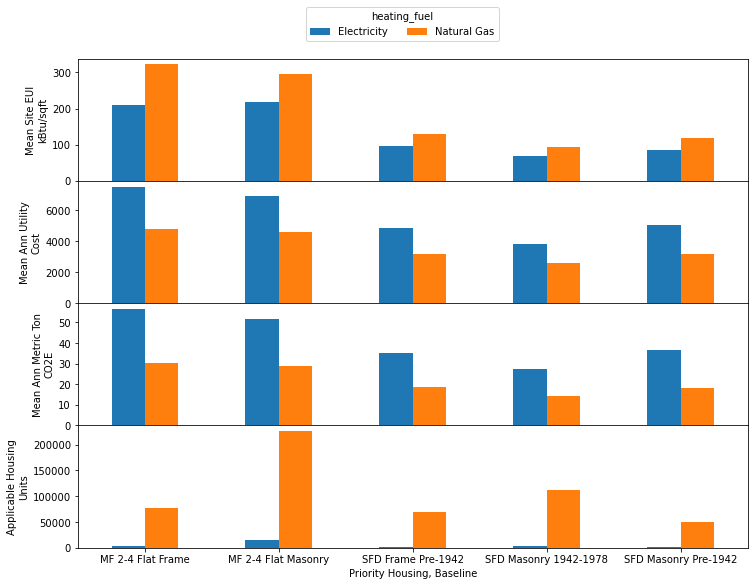

In [15]:
import matplotlib.pyplot as plt
from textwrap import wrap

fig, axs = plt.subplots(ress.shape[1], sharex=True, figsize=(12,9))

for i, col in enumerate(ress.columns):
    ress[col].unstack(level=1).plot(kind='bar', ax=axs[i], legend=False, rot=0)
    axs[i].set_ylabel('\n'.join(wrap(col, 20)))
    

handles, labels = axs[i].get_legend_handles_labels()
fig.legend(handles,     # The line objects
           labels=labels,   # The labels for each line
           loc="lower center",   # Position of legend
           borderaxespad=None,    # Small spacing around legend box
           title="heating_fuel",  # Title for the legend
           ncol=2,
           bbox_to_anchor=(0.5, 0.9)
           )

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0)


### Get results by building prototypes from Elevate Energy
#### Note: cannot add prototype tags to ResStock results as prototypes overlap in chars

In [16]:
## Elevate Energy prototype chars
groups = pd.read_csv(os.path.join(result_path,'Groups.csv'))
print('prototypes loaded')

prototypes loaded


In [17]:
Metric_map1 = {'count': 'completed_status',
           'median gas': 'simulation_output_report.total_site_natural_gas_therm',
           'median elec': 'simulation_output_report.total_site_electricity_kwh'}
Metric_map2 = {'mean gas': 'simulation_output_report.total_site_natural_gas_therm',
           'mean elec': 'simulation_output_report.total_site_electricity_kwh'} # metric: res_var

### (1) get median consumption
for i, row in groups.iterrows():
    res_group_i = get_res_by_prototype(res, res, row) # <----
    
    for metric, res_var in Metric_map1.items():
        if metric == 'count':
            groups.loc[i, 'count'] = len(res_group_i)
        else:
            groups.loc[i, metric] = res_group_i[res_var].median()

groups['Gas Diff-med(%)'] = ((groups['Non-normalized gas usage'] - groups['median gas']) / groups['Non-normalized gas usage']) * 100
groups['Elec Diff-med(%)'] = ((groups['Non-normalized elec. usage'] - groups['median elec']) / groups['Non-normalized elec. usage']) * 100
print('>> median consumption computed')

### (2) get mean consumption
for i, row in groups.iterrows():
    res_group_i = get_res_by_prototype(res, res, row) # <----
    
    for metric, res_var in Metric_map2.items():
        groups.loc[i, metric] = res_group_i[res_var].mean()

groups['Gas Diff-mean(%)'] = ((groups['Non-normalized gas usage'] - groups['mean gas']) / groups['Non-normalized gas usage']) * 100
groups['Elec Diff-mean(%)'] = ((groups['Non-normalized elec. usage'] - groups['mean elec']) / groups['Non-normalized elec. usage']) * 100
print('>> mean consumption computed')



>> median consumption computed
>> mean consumption computed


In [18]:
### (3) get median & mean sqft & eui
Metric_map1 = {'median sqft': 'sqft',
               'median gas eui': 'gas_eui', 
               'median elec eui': 'elec_eui'}
Metric_map2 = {'mean sqft': 'sqft', 
               'mean gas eui': 'gas_eui', 
               'mean elec eui': 'elec_eui'}

for i, row in groups.iterrows():
    res_group_i = get_res_by_prototype(res, res, row) # <----
    
    ### (3.1) get median values
    for metric, res_var in Metric_map1.items():
        groups.loc[i, metric] = res_group_i[res_var].median()

    ### (3.2) get mean values
    for metric, res_var in Metric_map2.items():
        groups.loc[i, metric] = res_group_i[res_var].mean()

print('>> median & mean sqft & eui computed:')

groups.set_index(['HousingGroupNo','HousingGroupName'])[['median sqft', 'mean sqft',
                                                         'median gas','mean gas',
                                                         'median gas eui', 'mean gas eui', 
                                                         'median elec','mean elec', 
                                                         'median elec eui','mean elec eui']]


>> median & mean sqft & eui computed:


,,median sqft,mean sqft,median gas,mean gas,median gas eui,mean gas eui,median elec,mean elec,median elec eui,mean elec eui
HousingGroupNo,HousingGroupName,,,,,,,,,,
1,Masonry Post-1978 less than 2 stories,2176.0,2394.582482,770.289033,843.541954,0.382565,0.414487,8862.805344,9863.628855,4.240620,4.858480
2,Masonry All Years Split Level,1690.0,2000.196867,1101.417777,1221.612676,0.659860,0.700950,9174.567792,10518.946316,5.394885,6.144101
3,Masonry Post-1978 2 or more stories,3301.0,4058.270428,1256.691665,1294.362331,0.366629,0.398438,11714.963750,13522.387666,3.531324,4.001263
4,Masonry 1942-1978 Less than 2 Stories,1690.0,1680.132653,990.430960,1079.722717,0.656779,0.688797,8669.259379,9679.869739,5.611709,6.336412
5,Masonry 1942-1978 2 or more stories,2176.0,2392.638539,1508.134544,1592.049329,0.723526,0.750370,10392.419481,12029.815996,4.994180,5.827346
6,Masonry Pre-1942 less than 2 stories,1220.0,1460.060606,1294.132956,1362.068695,0.973798,1.010591,8947.150452,9983.917096,6.826948,7.459787
7,Masonry Pre-1942 2 or more stories,2176.0,2552.909881,1735.432524,1877.616418,0.829290,0.868567,11155.543848,13449.214012,5.273211,6.386208
8,Frame Post-1978 Less than 2 stories,2176.0,2243.300336,809.379013,883.886890,0.428489,0.455355,8784.101674,9873.097283,4.598008,5.152124
9,Frame Post-1978 Split Level,2176.0,3012.053452,1038.708927,1154.874483,0.441523,0.460227,9872.647995,11753.555775,4.049147,4.721328


In [19]:
##### (4) get heating and cooling end uses to "groups"
Metric_map1 = ['frac_gas_heating', 'frac_elec_heating', 'frac_elec_cooling']
Metric_map2 = {'size_heating_kbut_h': 'simulation_output_report.size_heating_system_kbtu_h',
               'size_cooling_kbut_h': 'simulation_output_report.size_cooling_system_kbtu_h'}

for i, row in groups.iterrows():
    res_group_i = get_res_by_prototype(res, res, row)
    
    ### (4.1) get fractions
    groups.loc[i, 'frac_gas_heating'] = res_group_i['total_gas_heating'].mean() / \
        res_group_i['simulation_output_report.total_site_natural_gas_therm'].mean()

    groups.loc[i, 'frac_elec_heating'] = res_group_i['total_elec_heating'].mean() / \
        res_group_i['simulation_output_report.total_site_electricity_kwh'].mean()
    
    groups.loc[i, 'frac_elec_cooling'] = res_group_i['total_elec_cooling'].mean() / \
        res_group_i['simulation_output_report.total_site_electricity_kwh'].mean()
    
    ### (4.2) get mean values
    for metric, res_var in Metric_map2.items():
        groups.loc[i, metric] = res_group_i[res_var].mean()

print('computed')

computed


In [20]:
### (5) get heating & cooling and floor area char breakdowns

House = []
House_chars = [cooling_col, heating_col,
              #'build_existing_model.geometry_floor_area',
              'build_existing_model.insulation_unfinished_attic']

for i, row in groups.iterrows():
    
    res_group_i = get_res_by_prototype(res, res, row)
    
    Ns = len(res_group_i)
    Hi = []
    for char in House_chars:
        Nchar = res_group_i.groupby(char)['building_id'].count()/Ns # fractions
        Nchar = Nchar.rename('fraction').to_frame()
        Nchar['housing_char'] = Nchar.index.name
        Hi.append(Nchar)
    
    Hi = pd.concat(Hi, axis=0)
    Hi.index.name = 'sub_char'
    Hi = Hi.reset_index()
    Hi['HousingGroupNo'] = row['HousingGroupNo']
    
    House.append(Hi)
    
House = pd.concat(House, axis=0)
House = pd.pivot_table(House, values='fraction', index=['HousingGroupNo'],
                    columns=['housing_char','sub_char'], aggfunc=np.sum)

print('computed')

computed


In [21]:
## Combine "groups" + "House" into "Out" for export
out = groups.drop(['Stories','WallType','Vintage'], axis=1)
out = pd.concat([out.set_index('HousingGroupNo')], axis=1, keys=['none']).join(House)
out

none                     \
                                     HousingGroupName Chicago Prevalence   
HousingGroupNo                                                             
1               Masonry Post-1978 less than 2 stories           0.009009   
2                       Masonry All Years Split Level           0.012012   
3                 Masonry Post-1978 2 or more stories           0.044044   
4               Masonry 1942-1978 Less than 2 Stories           0.235235   
5                 Masonry 1942-1978 2 or more stories           0.072072   
6                Masonry Pre-1942 less than 2 stories           0.160160   
7                  Masonry Pre-1942 2 or more stories           0.041041   
8                 Frame Post-1978 Less than 2 stories           0.001001   
9                         Frame Post-1978 Split Level           0.004004   
10                  Frame Post-1978 2 or more stories           0.025025   
11                Frame 1942-1978 less than 2 stories           0.082082   
12                         Frame Pre-1942 Split Level           0.014014   
13                  Frame 1942-1978 2 or more stories           0.023023   
14                 Frame Pre-1942 less than 2 stories           0.218218   
15                   Frame Pre-1942 2 or more stories           0.059059   

                                                              \
               Cook Cnty Prevalence Non-normalized gas usage   
HousingGroupNo                                                 
1                          0.012987                     1133   
2                          0.019980                     1416   
3                          0.032967                     1812   
4                          0.191808                     1210   
5                          0.045954                     1427   
6                          0.073926                     1504   
7                          0.021978                     2044   
8                          0.015984                     1054   
9                          0.021978                     1168   
10                         0.087912                     1422   
11                         0.183816                     1176   
12                         0.064935                     1297   
13                         0.066933                     1530   
14                         0.109890                     1340   
15                         0.048951                     1753   

                                                                              \
               Non-normalized elec. usage   count   median gas   median elec   
HousingGroupNo                                                                 
1                                   10282   685.0   770.289033   8862.805344   
2                                    9661  9128.0  1101.417777   9174.567792   
3                                   18225   514.0  1256.691665  11714.963750   
4                                    8779  5488.0   990.430960   8669.259379   
5                                   10549   794.0  1508.134544  10392.419481   
6                                    9299   726.0  1294.132956   8947.150452   
7                                   13272   921.0  1735.432524  11155.543848   
8                                    9353   596.0   809.379013   8784.101674   
9                                   10445  1347.0  1038.708927   9872.647995   
10                                  13495   751.0  1277.046110  11025.929689   
11                                   9213  3012.0  1049.028625   8481.465143   
12                                   9964  2128.0  1710.661200   9947.314779   
13                                  12543  1138.0  1611.373334  10001.553045   
14                                   9103   703.0  1349.986539   8574.391032   
15                                  11967  1425.0  1876.872926  10527.340982   

                                                 ...  \
               Gas Diff-med(%)

### Write output to folder

In [22]:
#out_name = "Groups_results" + "_" + baseline_result.split("_")[2]
out.to_csv(os.path.join(result_path, iteration_path, 'baseline_prototype_results.csv'), index=True)
print(f'file saved to:\n  {os.path.join(result_path, iteration_path)}')

file saved to:
  /Users/lliu2/Documents/Chicago retrofits/ResStock results/cookcnty_2007_12/baseline


### Additional slicing for diagnosis

In [23]:
### get sqft distr by building type and vintage
res_sqft_distr = res.groupby(['build_existing_model.geometry_building_type_recs', 'build_existing_model.vintage_acs',
    'build_existing_model.geometry_floor_area'])['building_id'].count().to_frame()

# normalize
res_sqft_distr = res_sqft_distr.groupby(level = [0,1])['building_id'].apply(lambda x: x/x.sum()).unstack(level=2)

# export
res_sqft_distr.to_csv(os.path.join(result_path, iteration_path, 'building_type_vintage_floor_area.csv'), index=True)
print('sqft distr by vintage & bldg type exported')


sqft distr by vintage & bldg type exported


In [24]:
### get foundation type distr by building type, vintage
print('>> prevalence')
res_found_distr = res[res['build_existing_model.geometry_building_type_recs'] =="Single-Family Detached"].groupby(
    ['build_existing_model.geometry_wall_type','build_existing_model.vintage', 'build_existing_model.geometry_stories',
    'build_existing_model.geometry_foundation_type'])['building_id'].count().to_frame()

# normalize
res_found_distr = res_found_distr.groupby(level = [0,1])['building_id'].apply(lambda x: x/x.sum()).unstack(level=-1)
display(res_found_distr)


>> prevalence


build_existing_model.geometry_foundation_type                                                                  Crawl  \
build_existing_model.geometry_wall_type build_existing_model.vintage build_existing_model.geometry_stories             
Masonry                                 1940s                        1                                      0.098422   
                                                                     2                                      0.005571   
                                                                     3                                           NaN   
                                        1950s                        1                                      0.104133   
                                                                     2                                      0.009437   
                                                                     3                                      0.000325   
                                        1960s                        1                                      0.156332   
                                                                     2                                      0.019789   
                                                                     3                                      0.001979   
                                        1970s                        1                                      0.136364   
                                                                     2                                      0.027597   
                                                                     3                                           NaN   
                                        1980s                        1                                      0.120521   
                                                                     2                                      0.074919   
                                                                     3                                      0.016287   
                                        1990s                        1                                      0.131926   
                                                                     2                                      0.050132   
                                                                     3                                      0.010554   
                                        2000s                        1                                      0.072687   
                                                                     2                                      0.044053   
                                                                     3                                      0.035242   
                                        2010s                        1                                      0.050847   
                                                                     2                                      0.101695   
                                                                     3                                           NaN   
                                        <1940                        1                                      0.067395   
                                                                     2                                      0.076503   
                                                                     3                                      0.009107   
WoodStud                                1940s                        1                                      0.130189   
                                                                     2                                      0.047170   
                                                                     3                                      0.001887   
                                        1950s                        1                                      0.098473   
                                        

In [25]:
print('\n>> gas usage')
res_found_gas = res[(res['build_existing_model.geometry_building_type_recs'] =="Single-Family Detached")
                   ].groupby(
    ['build_existing_model.geometry_wall_type', 'build_existing_model.vintage_acs', 
#     'build_existing_model.geometry_stories', 
     'build_existing_model.geometry_floor_area_bin',
    'build_existing_model.geometry_foundation_type'])[
    
#    'gas_eui'
#    'elec_eui'
    'simulation_output_report.total_site_natural_gas_therm'
#    'simulation_output_report.total_site_electricity_kwh'
    
].mean().to_frame()
res_found_gas = res_found_gas.unstack(level=-1)
#res_found_gas.to_csv(os.path.join(result_path, iteration_path, 'building_type_vintage_foundation_elec_eui.csv'))
res_found_gas


>> gas usage


simulation_output_report.total_site_natural_gas_therm  \
build_existing_model.geometry_foundation_type                                                                                                                         Crawl   
build_existing_model.geometry_wall_type build_existing_model.vintage_acs build_existing_model.geometry_floor_area_bin                                                         
Masonry                                 1940-59                          0-1499                                                                              1195.899059      
                                                                         1500-2499                                                                           1687.657576      
                                                                         2500-3999                                                                           2367.278332      
                                                                         4000+                                                                               3403.916300      
                                        1960-79                          0-1499                                                                              1094.018677      
                                                                         1500-2499                                                                           1533.430906      
                                                                         2500-3999                                                                           2294.613932      
                                                                         4000+                                                                               4276.943670      
                                        1980-99                          0-1499                                                                               670.877634      
                                                                         1500-2499                                                                           1024.519426      
                                                                         2500-3999                                                                           1582.656175      
                                                                         4000+                                                                               2366.530009      
                                        2000-09                          0-1499                                                                               524.822673      
                                                                         1500-2499                                                                            673.098911      
                                                                         2500-3999                                                                            934.548101      
                                                                         4000+                                                                               1523.242907      
                                        2010s                            0-1499                                                                                 0.000000      
                                                                         1500-2499                                                                                   NaN      
                                                                         2500-3999                                                                           1047.218131      
                                                                         4000+                                                                               1805.745073      
                                        <1940                            0-1499              

In [26]:
print('\n>> gas usage')
res_found_gas = res[(res['build_existing_model.geometry_building_type_recs'] =="Single-Family Detached")
                   ].groupby(
    ['build_existing_model.geometry_wall_type', 'vintage', 
     'stories', 
#     'build_existing_model.geometry_floor_area_bin',
    'build_existing_model.geometry_foundation_type'])[
    
    'gas_eui'
#    'elec_eui'
#    'simulation_output_report.total_site_natural_gas_therm'
#    'simulation_output_report.total_site_electricity_kwh'
    
].mean().to_frame()
res_found_gas = res_found_gas.unstack(level=-1)
#res_found_gas.to_csv(os.path.join(result_path, iteration_path, 'building_type_vintage_foundation_gas_eui2.csv'))
res_found_gas


>> gas usage


gas_eui  \
build_existing_model.geometry_foundation_type                    Crawl   
build_existing_model.geometry_wall_type vintage   stories                
Masonry                                 1942-1978 2+ stories  0.910986   
                                                  <2 stories  0.924668   
                                        Post-1978 2+ stories  0.440024   
                                                  <2 stories  0.454212   
                                        Pre-1942  2+ stories  0.969907   
                                                  <2 stories  1.271221   
WoodStud                                1942-1978 2+ stories  0.990189   
                                                  <2 stories  0.944037   
                                        Post-1978 2+ stories  0.528419   
                                                  <2 stories  0.494391   
                                        Pre-1942  2+ stories  1.109764   
                                                  <2 stories  1.286483   

                                                                              \
build_existing_model.geometry_foundation_type                Heated Basement   
build_existing_model.geometry_wall_type vintage   stories                      
Masonry                                 1942-1978 2+ stories        0.643157   
                                                  <2 stories        0.531368   
                                        Post-1978 2+ stories        0.305796   
                                                  <2 stories        0.294667   
                                        Pre-1942  2+ stories        0.727941   
                                                  <2 stories        0.681788   
WoodStud                                1942-1978 2+ stories        0.738202   
                                                  <2 stories        0.526210   
                                        Post-1978 2+ stories        0.398468   
                                                  <2 stories        0.338075   
                                        Pre-1942  2+ stories        0.821284   
                                                  <2 stories        0.793407   

                                                                            \
build_existing_model.geometry_foundation_type                Pier and Beam   
build_existing_model.geometry_wall_type vintage   stories                    
Masonry                                 1942-1978 2+ stories      1.178634   
                                                  <2 stories      1.156289   
                                        Post-1978 2+ stories      0.635413   
                                                  <2 stories      0.736144   
                                        Pre-1942  2+ stories      1.006789   
                                                  <2 stories      1.413939   
WoodStud                                1942-1978 2+ stories      0.967244   
                                                  <2 stories      0.997676   
                                        Post-1978 2+ stories      0.623916   
                                                  <2 stories      0.639033   
                                        Pre-1942  2+ stories      1.278351   
                                                  <2 stories      1.143186   

                                                                        \
build_existing_model.geometry_foundation_type                     Slab   
build_existing_model.geometry_wall_type vintage   stories                
Masonry                                 1942-1978 2+ stories  0.817431   
                                                  <2 stories  0.711607   
                                        Post-1978 2+ stories  0.491121   
                                                  <2 stories  0.492871   
                                        Pre-1942  2+ stories  

In [27]:
### get foundation type distr by building type, vintage (EE prototype)
print('>> prevalence')
res_found_distr = res[res['build_existing_model.geometry_building_type_recs'] =="Single-Family Detached"].groupby(
    ['build_existing_model.geometry_wall_type', 'vintage', 'stories',
    'build_existing_model.geometry_foundation_type'])['building_id'].count().to_frame()

# normalize
res_found_distr = res_found_distr.groupby(level = [0,1])['building_id'].apply(lambda x: x/x.sum()).unstack(level=-1)
display(res_found_distr)

print('\n>> gas usage')
res_found_gas = res[res['build_existing_model.geometry_building_type_recs'] =="Single-Family Detached"].groupby(
    ['build_existing_model.geometry_wall_type', 'vintage', 'stories',
    'build_existing_model.geometry_foundation_type'])[
    'simulation_output_report.total_site_natural_gas_therm'].mean().to_frame()
res_found_gas.unstack(level=-1)


>> prevalence


build_existing_model.geometry_foundation_type                    Crawl  \
build_existing_model.geometry_wall_type vintage   stories                
Masonry                                 1942-1978 2+ stories  0.013690   
                                                  <2 stories  0.118911   
                                        Post-1978 2+ stories  0.077565   
                                                  <2 stories  0.102585   
                                        Pre-1942  2+ stories  0.085610   
                                                  <2 stories  0.067395   
WoodStud                                1942-1978 2+ stories  0.043855   
                                                  <2 stories  0.106988   
                                        Post-1978 2+ stories  0.073497   
                                                  <2 stories  0.075724   
                                        Pre-1942  2+ stories  0.123120   
                                                  <2 stories  0.050282   

build_existing_model.geometry_foundation_type                 Heated Basement  \
build_existing_model.geometry_wall_type vintage   stories                       
Masonry                                 1942-1978 2+ stories         0.058580   
                                                  <2 stories         0.381566   
                                        Post-1978 2+ stories         0.156797   
                                                  <2 stories         0.206005   
                                        Pre-1942  2+ stories         0.163327   
                                                  <2 stories         0.141469   
WoodStud                                1942-1978 2+ stories         0.089398   
                                                  <2 stories         0.239759   
                                        Post-1978 2+ stories         0.195991   
                                                  <2 stories         0.154417   
                                        Pre-1942  2+ stories         0.163534   
                                                  <2 stories         0.093985   

build_existing_model.geometry_foundation_type                 Pier and Beam  \
build_existing_model.geometry_wall_type vintage   stories                     
Masonry                                 1942-1978 2+ stories       0.001273   
                                                  <2 stories       0.014963   
                                        Post-1978 2+ stories       0.011676   
                                                  <2 stories       0.019183   
                                        Pre-1942  2+ stories       0.009107   
                                                  <2 stories       0.011536   
WoodStud                                1942-1978 2+ stories       0.008434   
                                                  <2 stories       0.018795   
                                        Post-1978 2+ stories       0.008909   
                                                  <2 stories       0.005197   
                                        Pre-1942  2+ stories       0.003759   
                                                  <2 stories       0.001410   

build_existing_model.geometry_foundation_type                     Slab  \
build_existing_model.geometry_wall_type vintage   stories                
Masonry                                 1942-1978 2+ stories  0.024992   
                                                  <2 stories  0.178606   
                                        Post-1978 2+ stories  0.090909   
                                                  <2 stories  0.158465   
                                        Pre-1942  2+ stories  0.051002   
                                                  <2 stories  0.034608   
WoodStud                                1942-1978 2+ stories  0.057590   
                                                  <2 st


>> gas usage


simulation_output_report.total_site_natural_gas_therm  \
build_existing_model.geometry_foundation_type                                                                Crawl   
build_existing_model.geometry_wall_type vintage   stories                                                            
Masonry                                 1942-1978 2+ stories                                        1987.309540      
                                                  <2 stories                                        1492.799172      
                                        Post-1978 2+ stories                                        1393.359470      
                                                  <2 stories                                         939.479761      
                                        Pre-1942  2+ stories                                        2340.856215      
                                                  <2 stories                                        1847.266855      
WoodStud                                1942-1978 2+ stories                                        1961.857995      
                                                  <2 stories                                        1485.344194      
                                        Post-1978 2+ stories                                        1659.068503      
                                                  <2 stories                                        1043.531696      
                                        Pre-1942  2+ stories                                        2226.418041      
                                                  <2 stories                                        1744.200219      

                                                                              \
build_existing_model.geometry_foundation_type                Heated Basement   
build_existing_model.geometry_wall_type vintage   stories                      
Masonry                                 1942-1978 2+ stories     1370.194054   
                                                  <2 stories      810.070735   
                                        Post-1978 2+ stories     1066.570433   
                                                  <2 stories      577.463902   
                                        Pre-1942  2+ stories     1533.285421   
                                                  <2 stories      884.329556   
WoodStud                                1942-1978 2+ stories     1469.220819   
                                                  <2 stories      819.708752   
                                        Post-1978 2+ stories     1083.576944   
                                                  <2 stories      624.315768   
                                        Pre-1942  2+ stories     1577.741287   
                                                  <2 stories     1022.264493   

                                                                            \
build_existing_model.geometry_foundation_type                Pier and Beam   
build_existing_model.geometry_wall_type vintage   stories                    
Masonry                                 1942-1978 2+ stories   2087.520990   
                                                  <2 stories   1722.902075   
                                        Post-1978 2+ stories   1964.487346   
                                                  <2 stories   1457.200487   
                                        Pre-1942  2+ stories   2532.412916   
                                                  <2 stories   1903.171409   
WoodStud                                1942-1978 2+ stories   2030.424073   
                                                  <2 stories   1692.763432   
                                        Post-1978 2+ stories   2782.530660   
                                                  <2 stories    829.533535   
                                        Pre-1942  2+ stories   2398.799006 

In [28]:
para = 'gas_eui'
print(f'>> for {para}')
res[res['build_existing_model.geometry_building_type_recs'] == "Single-Family Detached"].groupby([
    'build_existing_model.geometry_wall_type','build_existing_model.geometry_stories',
'build_existing_model.vintage'])[para].mean().unstack(level=-1)

>> for gas_eui


build_existing_model.vintage                                                      1940s  \
build_existing_model.geometry_wall_type build_existing_model.geometry_stories             
Masonry                                 1                                      0.707152   
                                        2                                      0.786576   
                                        3                                      0.754823   
WoodStud                                1                                      0.851580   
                                        2                                      0.914681   
                                        3                                      1.150165   

build_existing_model.vintage                                                      1950s  \
build_existing_model.geometry_wall_type build_existing_model.geometry_stories             
Masonry                                 1                                      0.706350   
                                        2                                      0.762543   
                                        3                                      0.884043   
WoodStud                                1                                      0.822181   
                                        2                                      0.953663   
                                        3                                      1.129541   

build_existing_model.vintage                                                      1960s  \
build_existing_model.geometry_wall_type build_existing_model.geometry_stories             
Masonry                                 1                                      0.658519   
                                        2                                      0.712867   
                                        3                                      0.720745   
WoodStud                                1                                      0.704321   
                                        2                                      0.839067   
                                        3                                      0.953580   

build_existing_model.vintage                                                      1970s  \
build_existing_model.geometry_wall_type build_existing_model.geometry_stories             
Masonry                                 1                                      0.638717   
                                        2                                      0.712346   
                                        3                                      0.946817   
WoodStud                                1                                      0.590735   
                                        2                                      0.646414   
                                        3                                      0.835632   

build_existing_model.vintage                                                      1980s  \
build_existing_model.geometry_wall_type build_existing_model.geometry_stories             
Masonry                                 1                                      0.507270   
                                        2                                      0.513908   
                                        3                                      0.334322   
WoodStud                                1                                      0.486064   
                                        2                                      0.536059   
                                        3                                      0.696123   

build_existing_model.vintage                                                      1990s  \
build_existing_model.geometry_wall_type build_existing_model.geometry_stories             
Masonry                                 1                                      0.465951   
                                        2                                      0.5

In [29]:
para = 'simulation_output_report.total_site_natural_gas_therm'
print(f'>> for {para}')
res[res['build_existing_model.geometry_building_type_recs'] == "Single-Family Detached"].groupby([
    'build_existing_model.geometry_wall_type','build_existing_model.geometry_stories',
'build_existing_model.vintage'])[para].mean().unstack(level=-1)

>> for simulation_output_report.total_site_natural_gas_therm


build_existing_model.vintage                                                         1940s  \
build_existing_model.geometry_wall_type build_existing_model.geometry_stories                
Masonry                                 1                                      1062.844649   
                                        2                                      1516.722388   
                                        3                                      2491.671379   
WoodStud                                1                                      1220.942032   
                                        2                                      1642.637206   
                                        3                                      2801.175031   

build_existing_model.vintage                                                         1950s  \
build_existing_model.geometry_wall_type build_existing_model.geometry_stories                
Masonry                                 1                                      1061.698156   
                                        2                                      1596.766716   
                                        3                                      1809.887959   
WoodStud                                1                                      1195.605541   
                                        2                                      1745.302379   
                                        3                                      2432.211564   

build_existing_model.vintage                                                         1960s  \
build_existing_model.geometry_wall_type build_existing_model.geometry_stories                
Masonry                                 1                                      1119.857787   
                                        2                                      1575.162698   
                                        3                                      1704.423725   
WoodStud                                1                                      1187.572992   
                                        2                                      1820.715813   
                                        3                                      2417.920296   

build_existing_model.vintage                                                         1970s  \
build_existing_model.geometry_wall_type build_existing_model.geometry_stories                
Masonry                                 1                                      1105.325470   
                                        2                                      1609.050391   
                                        3                                      2194.192211   
WoodStud                                1                                       982.013499   
                                        2                                      1450.464123   
                                        3                                      1672.648060   

build_existing_model.vintage                                                         1980s  \
build_existing_model.geometry_wall_type build_existing_model.geometry_stories                
Masonry                                 1                                       988.286266   
                                        2                                      1352.061518   
                                        3                                      2001.429231   
WoodStud                                1                                       949.946351   
                                        2                                      1521.491026   
                                        3                                      2068.630748   

build_existing_model.vintage                                                         1990s  \
build_existing_model.geometry_wall_type build_existing_model.geometry_stories                
Masonry                                 1      

In [30]:
para = 'sqft'
print(f'>> for {para}')
res[res['build_existing_model.geometry_building_type_recs'] == "Single-Family Detached"].groupby([
    'build_existing_model.geometry_wall_type','build_existing_model.geometry_stories',
'build_existing_model.vintage'])[para].mean().unstack(level=-1)

>> for sqft


build_existing_model.vintage                                                         1940s  \
build_existing_model.geometry_wall_type build_existing_model.geometry_stories                
Masonry                                 1                                      1614.780231   
                                        2                                      2192.128000   
                                        3                                      3301.000000   
WoodStud                                1                                      1500.051351   
                                        2                                      2061.947368   
                                        3                                      3029.375000   

build_existing_model.vintage                                                         1950s  \
build_existing_model.geometry_wall_type build_existing_model.geometry_stories                
Masonry                                 1                                      1595.706681   
                                        2                                      2317.176991   
                                        3                                      2288.900000   
WoodStud                                1                                      1547.679330   
                                        2                                      1962.656410   
                                        3                                      2304.680000   

build_existing_model.vintage                                                         1960s  \
build_existing_model.geometry_wall_type build_existing_model.geometry_stories                
Masonry                                 1                                      1815.888285   
                                        2                                      2532.133971   
                                        3                                      2780.777778   
WoodStud                                1                                      1838.131034   
                                        2                                      2483.868613   
                                        3                                      3027.965517   

build_existing_model.vintage                                                         1970s  \
build_existing_model.geometry_wall_type build_existing_model.geometry_stories                
Masonry                                 1                                      1903.677481   
                                        2                                      2579.857143   
                                        3                                      2256.000000   
WoodStud                                1                                      1769.326112   
                                        2                                      2563.744000   
                                        3                                      2097.500000   

build_existing_model.vintage                                                         1980s  \
build_existing_model.geometry_wall_type build_existing_model.geometry_stories                
Masonry                                 1                                      2082.747312   
                                        2                                      2925.340659   
                                        3                                      6766.633333   
WoodStud                                1                                      2232.348659   
                                        2                                      3407.213376   
                                        3                                      3382.111111   

build_existing_model.vintage                                                         1990s  \
build_existing_model.geometry_wall_type build_existing_model.geometry_stories                
Masonry                                 1      

In [31]:
res_by_foundation = res[(res['build_existing_model.geometry_building_type_recs'] == "Single-Family Detached")].groupby([
    'vintage', 'stories', 'build_existing_model.geometry_wall_type',
    'build_existing_model.geometry_foundation_type'
])
res_by_foundation1 = res_by_foundation['gas_eui'].mean().unstack(level=0)
res_by_foundation2 = res_by_foundation[
    'simulation_output_report.total_site_natural_gas_therm'].mean().unstack(level=0)
res_by_foundation3 = res_by_foundation['building_id'].count().unstack(level=0)
res_by_foundation4 = res_by_foundation['sqft'].mean().unstack(level=0)

res_by_foundation1['type'] = 'gas eui'
res_by_foundation2['type'] = 'gas'
res_by_foundation3['type'] = 'count'
res_by_foundation4['type'] = 'sqft'

res_by_foundation_all = pd.concat([res_by_foundation1,res_by_foundation2,res_by_foundation3, res_by_foundation4], axis=0)
#res_by_foundation_all.to_csv(os.path.join(result_path, iteration_path, 'building_type_vintage_foundation.csv'), index=True)
print('foundation type eui, sqft, count distr by vintage & bldg type exported')

res_by_foundation_all.head(10*4)

foundation type eui, sqft, count distr by vintage & bldg type exported


vintage                                                                                             1942-1978  \
stories    build_existing_model.geometry_wall_type build_existing_model.geometry_foundation_type                
2+ stories Masonry                                 Crawl                                             0.910986   
                                                   Heated Basement                                   0.643157   
                                                   Pier and Beam                                     1.178634   
                                                   Slab                                              0.817431   
                                                   Unheated Basement                                 0.817151   
           WoodStud                                Crawl                                             0.990189   
                                                   Heated Basement                                   0.738202   
                                                   Pier and Beam                                     0.967244   
                                                   Slab                                              0.898747   
                                                   Unheated Basement                                 0.878381   
<2 stories Masonry                                 Crawl                                             0.924668   
                                                   Heated Basement                                   0.531368   
                                                   Pier and Beam                                     1.156289   
                                                   Slab                                              0.711607   
                                                   Unheated Basement                                 0.805486   
           WoodStud                                Crawl                                             0.944037   
                                                   Heated Basement                                   0.526210   
                                                   Pier and Beam                                     0.997676   
                                                   Slab                                              0.705439   
                                                   Unheated Basement                                 0.833706   
2+ stories Masonry                                 Crawl                                          1987.309540   
                                                   Heated Basement                                1370.194054   
                                                   Pier and Beam                                  2087.520990   
                                                   Slab                                           1742.251447   
                                                   Unheated Basement                              1706.934229   
           WoodStud                                Crawl                                          1961.857995   
                                                   Heated Basement                                1469.220819   
                                                   Pier and Beam                                  2030.424073   
                                                   Slab                                           1828.279048   
                                                   Unheated Basement                              1774.081000   
<2 stories Masonry                                 Crawl                                          1492.799172   
                                                   Heated Basement                                 810.070735   
                                                   Pier and Beam                                  1722.902075   
                                             

In [32]:
vintage = ['1980s','1990s','2000s','2010s'] # <--- need to remove/change lines with arrows
res2 = res[res['build_existing_model.vintage'].isin(vintage)] # <--- need to remove/change lines with arrows

In [33]:
res_by_stories = res[(res['completed_status']=="Success") &
                     (res['build_existing_model.geometry_building_type_recs'] == "Single-Family Detached")
                    ].groupby([
    'build_existing_model.geometry_wall_type', 
    'vintage','build_existing_model.vintage',
    'stories','build_existing_model.geometry_stories'])[
        'simulation_output_report.total_site_natural_gas_therm',
        'simulation_output_report.total_site_electricity_kwh','sqft'
].mean()

res_by_stories['count'] = res[(res['completed_status']=="Success") &
                              (res['build_existing_model.geometry_building_type_recs'] == "Single-Family Detached")
                             ].groupby([
    'build_existing_model.geometry_wall_type',
    'vintage','build_existing_model.vintage',
    'stories','build_existing_model.geometry_stories'])['building_id'].count()
display(res_by_stories)

res_by_stories2 = res_by_stories.copy()
vintage_dict = {
    '<1940': '1: pre-1942',
    '1940s': '2: 1942-1978',
    '1950s': '2: 1942-1978',
    '1960s': '2: 1942-1978',
    '1970s': '2: 1942-1978',
    '1980s': '3: post-1978',
    '1990s': '3: post-1978',
    '2000s': '3: post-1978',
    '2010s': '3: post-1978'
}

for wt in ['Masonry','WoodStud']:
    for v, vee in vintage_dict.items():
        try:
            res_by_stories2.loc[((wt),(vee),(v),('2: 2+ stories'),('2')),'count'] -=\
            2*res_by_stories.loc[((wt),(vee),(v),('2: 2+ stories'),('3')),'count']
            res_by_stories2.loc[((wt),(vee),(v),('2: 2+ stories'),('3')),'count'] *= 3
        except:
            pass

res_by_stories2


<ipython-input-33-7cedd68be4ce>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  res_by_stories = res[(res['completed_status']=="Success") &


simulation_output_report.total_site_natural_gas_therm  \
build_existing_model.geometry_wall_type vintage   build_existing_model.vintage stories    build_existing_model.geometry_stories                                                          
Masonry                                 1942-1978 1940s                        2+ stories 2                                                                            1516.722388       
                                                                                          3                                                                            2491.671379       
                                                                               <2 stories 1                                                                            1062.844649       
                                                  1950s                        2+ stories 2                                                                            1596.766716       
                                                                                          3                                                                            1809.887959       
                                                                               <2 stories 1                                                                            1061.698156       
                                                  1960s                        2+ stories 2                                                                            1575.162698       
                                                                                          3                                                                            1704.423725       
                                                                               <2 stories 1                                                                            1119.857787       
                                                  1970s                        2+ stories 2                                                                            1609.050391       
                                                                                          3                                                                            2194.192211       
                                                                               <2 stories 1                                                                            1105.325470       
                                        Post-1978 1980s                        2+ stories 2                                                                            1352.061518       
                                                                                          3                                                                            2001.429231       
                                                                               <2 stories 1                                                                             988.286266       
                                                  1990s                        2+ stories 2                                                                            1355.540401       
                                                                                          3                                                                            2167.119813       
                                                                               <2 stories 1                                                                             927.870704       
                                                  2000s                        2+ stories 2                                                                             963.856093       
                                                                                          3                                                                            1277.165292       
                                     

simulation_output_report.total_site_natural_gas_therm  \
build_existing_model.geometry_wall_type vintage   build_existing_model.vintage stories    build_existing_model.geometry_stories                                                          
Masonry                                 1942-1978 1940s                        2+ stories 2                                                                            1516.722388       
                                                                                          3                                                                            2491.671379       
                                                                               <2 stories 1                                                                            1062.844649       
                                                  1950s                        2+ stories 2                                                                            1596.766716       
                                                                                          3                                                                            1809.887959       
                                                                               <2 stories 1                                                                            1061.698156       
                                                  1960s                        2+ stories 2                                                                            1575.162698       
                                                                                          3                                                                            1704.423725       
                                                                               <2 stories 1                                                                            1119.857787       
                                                  1970s                        2+ stories 2                                                                            1609.050391       
                                                                                          3                                                                            2194.192211       
                                                                               <2 stories 1                                                                            1105.325470       
                                        Post-1978 1980s                        2+ stories 2                                                                            1352.061518       
                                                                                          3                                                                            2001.429231       
                                                                               <2 stories 1                                                                             988.286266       
                                                  1990s                        2+ stories 2                                                                            1355.540401       
                                                                                          3                                                                            2167.119813       
                                                                               <2 stories 1                                                                             927.870704       
                                                  2000s                        2+ stories 2                                                                             963.856093       
                                                                                          3                                                                            1277.165292       
                                     

In [34]:
### check
display(res_by_stories['count'].sum())
display(res_by_stories2['count'].sum())
res_by_stories2.to_csv(os.path.join(result_path, iteration_path, 'check_results.csv'), index=True)

16753

16753

In [35]:
print('>> NG before:')
display(
    ((res_by_stories['simulation_output_report.total_site_natural_gas_therm']*res_by_stories['count']).groupby([
    'stories','build_existing_model.geometry_wall_type','vintage']).sum()/(res_by_stories['count'].groupby([
    'stories','build_existing_model.geometry_wall_type','vintage']).sum())).unstack(level=-1)
)
      
print('>> NG after:')
((res_by_stories2['simulation_output_report.total_site_natural_gas_therm']*res_by_stories2['count']).groupby([
    'stories','build_existing_model.geometry_wall_type','vintage']).sum()/(res_by_stories2['count'].groupby([
    'stories','build_existing_model.geometry_wall_type','vintage']).sum())).unstack(level=-1)
      

>> NG before:


vintage                                               1942-1978    Post-1978  \
stories    build_existing_model.geometry_wall_type                             
2+ stories Masonry                                  1592.049329  1294.362331   
           WoodStud                                 1723.991041  1369.932546   
<2 stories Masonry                                  1079.722717   843.541954   
           WoodStud                                 1134.206458   883.886890   

vintage                                                Pre-1942  
stories    build_existing_model.geometry_wall_type               
2+ stories Masonry                                  1877.616418  
           WoodStud                                 1991.495781  
<2 stories Masonry                                  1362.068695  
           WoodStud                                 1450.427969

>> NG after:


vintage                                               1942-1978    Post-1978  \
stories    build_existing_model.geometry_wall_type                             
2+ stories Masonry                                  1592.049329  1294.362331   
           WoodStud                                 1723.991041  1369.932546   
<2 stories Masonry                                  1079.722717   843.541954   
           WoodStud                                 1134.206458   883.886890   

vintage                                                Pre-1942  
stories    build_existing_model.geometry_wall_type               
2+ stories Masonry                                  1877.616418  
           WoodStud                                 1991.495781  
<2 stories Masonry                                  1362.068695  
           WoodStud                                 1450.427969

In [36]:
res[(res['completed_status']=="Success") &
    (res['build_existing_model.geometry_building_type_recs'] == "Single-Family Detached")
   ].groupby(['build_existing_model.vintage', 'build_existing_model.geometry_stories'])[
    'simulation_output_report.total_site_natural_gas_therm','gas_eui', 
    'simulation_output_report.total_site_electricity_kwh', 'elec_eui','sqft'].mean()

<ipython-input-36-c2fdf9be2997>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  res[(res['completed_status']=="Success") &


simulation_output_report.total_site_natural_gas_therm  \
build_existing_model.vintage build_existing_model.geometry_stories                                                          
1940s                        1                                                                            1107.126277       
                             2                                                                            1585.816440       
                             3                                                                            2766.785736       
1950s                        1                                                                            1094.814240       
                             2                                                                            1676.230239       
                             3                                                                            2254.404819       
1960s                        1                                                                            1147.144600       
                             2                                                                            1714.461980       
                             3                                                                            2144.666290       
1970s                        1                                                                            1028.134465       
                             2                                                                            1490.348095       
                             3                                                                            1904.445460       
1980s                        1                                                                             965.899872       
                             2                                                                            1483.421680       
                             3                                                                            2016.937273       
1990s                        1                                                                             907.441647       
                             2                                                                            1387.809842       
                             3                                                                            2010.244052       
2000s                        1                                                                             694.093048       
                             2                                                                            1012.857020       
                             3                                                                            1259.807416       
2010s                        1                                                                             602.580792       
                             2                                                                            1122.869968       
                             3                                                                            1764.710277       
<1940                        1                                                                            1405.537253       
                             2                                                                            1905.922808       
                             3                                                                            2581.072811       

                                                                     gas_eui  \
build_existing_model.vintage build_existing_model.geometry_stories             
1940s                        1                                      0.747605   
                             2                                      0.856872   
                             3                                      1.106239   
1950s                        1            